In [50]:
# !pip install -r rouge/requirements.text
# !pip install rouge-score
# !pip install bert-score



In [51]:
from rouge import Rouge
with open('MaterialSciencesGroundTruth.txt','r',encoding='utf-8') as file:
    y_true = file.readlines()
with open('BaselineChatAnswers.txt','r',encoding='utf-8') as file:
    baseline_y_pred = file.readlines()
with open('CompositesGuideAnswers.txt','r',encoding='utf-8') as file:
    test_y_pred = file.readlines()    
print(y_true[0].lower())

the experiments showed that the damping ratio increases with an increase in the excitation amplitude6.... this indicates that at higher excitation levels, more energy is dissipated.



In [52]:
from rouge_score import rouge_scorer

scorer = Rouge()
scores = scorer.get_scores(baseline_y_pred,y_true,avg = True)


In [53]:
scores


{'rouge-1': {'r': 0.28632521576297526,
  'p': 0.24462046386633537,
  'f': 0.25850372742149985},
 'rouge-2': {'r': 0.06104691575718526,
  'p': 0.05247704611160364,
  'f': 0.05544804659567699},
 'rouge-l': {'r': 0.25831273257641435,
  'p': 0.2206276616147011,
  'f': 0.23320106404364163}}

In [72]:
import pandas as pd
df1 = pd.DataFrame(scores)
df1.to_csv('GPT-4oComposites_rouge.csv', index=False)

In [7]:

test_scores = scorer.get_scores(test_y_pred,y_true,avg = True)


In [58]:
test_scores

{'rouge-1': {'r': 0.2869638335514184,
  'p': 0.17280415773897126,
  'f': 0.20902422803318552},
 'rouge-2': {'r': 0.052282144206017026,
  'p': 0.028837571218752998,
  'f': 0.03587598940076555},
 'rouge-l': {'r': 0.26070280272931534,
  'p': 0.15684748381034302,
  'f': 0.1898487330413802}}

In [71]:
df2 = pd.DataFrame(test_scores)
df2.to_csv('CG_rouge.csv', index=False)

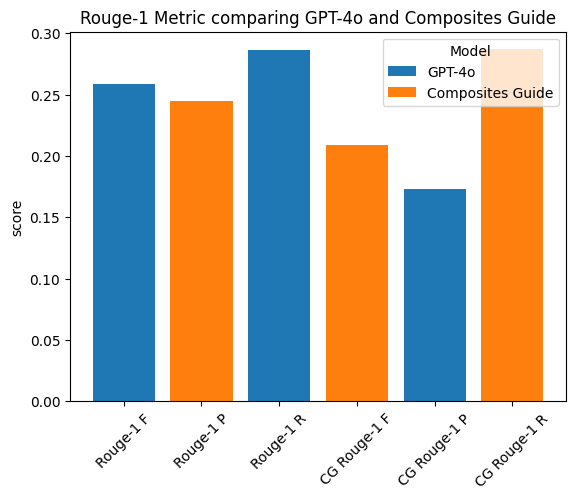

In [9]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
fruits = ['Rouge-1 F', 'Rouge-1 P', 'Rouge-1 R',
          'CG Rouge-1 F', 'CG Rouge-1 P', 'CG Rouge-1 R',]
        
counts = [scores['rouge-1']['f'],scores['rouge-1']['p'],scores['rouge-1']['r'],
          test_scores['rouge-1']['f'],test_scores['rouge-1']['p'],test_scores['rouge-1']['r'],]
        
bar_labels = ['GPT-4o', '_GPT-4o','_GPT-4o','Composites Guide','_Composites Guide', '_Composites Guide']
bar_colors = ['tab:blue', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('score')
ax.set_title('Rouge-1 Metric comparing GPT-4o and Composites Guide')
ax.legend(title='Model')
plt.savefig("ROUGE-1_CG.svg")
plt.show()


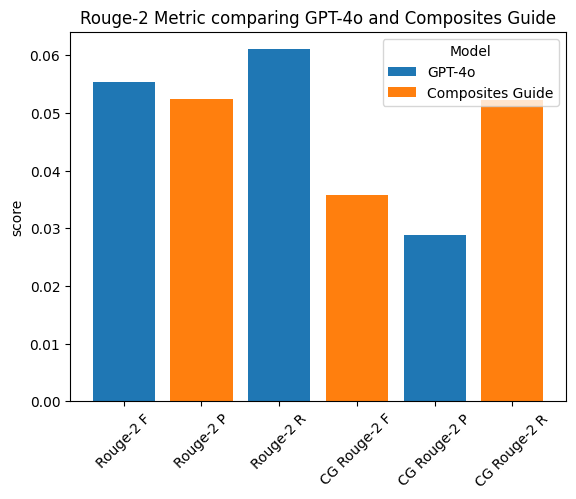

In [10]:


fig,ax = plt.subplots()
fruits = ['Rouge-2 F', 'Rouge-2 P', 'Rouge-2 R',
          'CG Rouge-2 F', 'CG Rouge-2 P', 'CG Rouge-2 R',]
        
counts = [scores['rouge-2']['f'],scores['rouge-2']['p'],scores['rouge-2']['r'],
          test_scores['rouge-2']['f'],test_scores['rouge-2']['p'],test_scores['rouge-2']['r'],]
        
bar_labels = ['GPT-4o', '_GPT-4o','_GPT-4o','Composites Guide','_Composites Guide', '_Composites Guide']
bar_colors = ['tab:blue', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('score')
ax.set_title('Rouge-2 Metric comparing GPT-4o and Composites Guide')
ax.legend(title='Model')
plt.savefig("ROUGE-2_CG.svg")
plt.show()

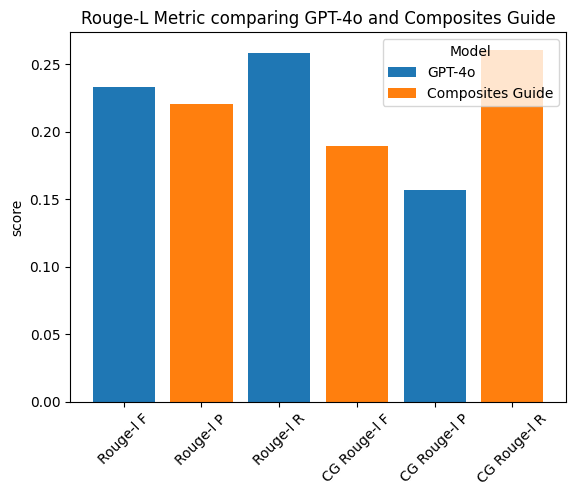

In [49]:


fig,ax = plt.subplots()
fruits = ['Rouge-l F', 'Rouge-l P', 'Rouge-l R',
          'CG Rouge-l F', 'CG Rouge-l P', 'CG Rouge-l R',]
        
counts = [scores['rouge-l']['f'],scores['rouge-l']['p'],scores['rouge-l']['r'],
          test_scores['rouge-l']['f'],test_scores['rouge-l']['p'],test_scores['rouge-l']['r'],]
        
bar_labels = ['GPT-4o', '_GPT-4o','_GPT-4o','Composites Guide','_Composites Guide', '_Composites Guide']
bar_colors = ['tab:blue', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('score')
ax.set_title('Rouge-L Metric comparing GPT-4o and Composites Guide')
ax.legend(title='Model')
plt.savefig("ROUGE-L_CG.svg")
plt.show()

In [12]:
from bert_score import score
baseline_P, baseline_R, baseline_F1 = score(baseline_y_pred,y_true,lang='en',verbose=True)

C:\Users\rucke\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 2/2 [00:20<00:00, 10.33s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 18.51it/s]

done in 20.72 seconds, 3.04 sentences/sec


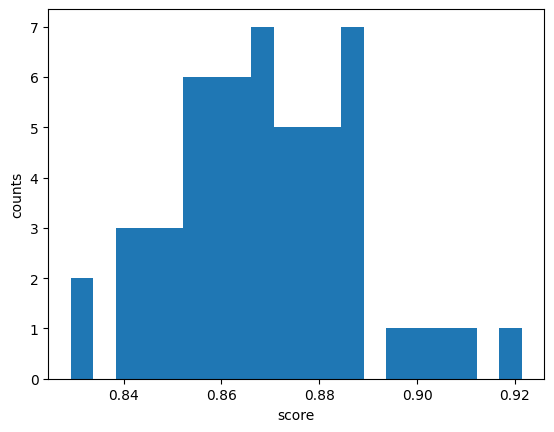

In [13]:
import matplotlib.pyplot as plt
plt.hist(baseline_F1, bins=20)
plt.xlabel("score")
plt.ylabel("counts")
plt.show()

In [69]:
cg_gpt = {'BERTScore P': baseline_P, 'BERTScore R' : baseline_R, 'BERTScore F1' : baseline_F1}
df3 = pd.DataFrame(cg_gpt)
df3.to_csv('baselineCG_bert.csv', index=False)

In [14]:
print(f"System Level Precision: {baseline_P.mean()}\nSystem Level Recall {baseline_R.mean()}\nSystem Level F1 score{baseline_F1.mean()}")

System Level Precision: 0.8686139583587646
System Level Recall 0.8681898713111877
System Level F1 score0.8683061003684998


In [15]:
cg_P, cg_R, cg_F1 = score(test_y_pred,y_true,lang='en',verbose=True)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 2/2 [00:29<00:00, 14.67s/it]


computing greedy matching.


100%|██████████| 1/1 [00:00<00:00, 20.83it/s]

done in 29.40 seconds, 2.14 sentences/sec


In [16]:
print(f"System Level Precision: {cg_P.mean()}\nSystem Level Recall {cg_R.mean()}\nSystem Level F1 score{cg_F1.mean()}")

System Level Precision: 0.8367717862129211
System Level Recall 0.8644028902053833
System Level F1 score0.8502180576324463


In [70]:
cg_test = {'BERTScore P': cg_P, 'BERTScore R' : cg_R, 'BERTScore F1' : cg_F1}
df4 = pd.DataFrame(cg_test)
df4.to_csv('CG_bert.csv', index=False)

In [17]:
with open('GroundTruthMMRs.txt','r',encoding='utf-8') as file:
    mmr_y_true = file.readlines()
with open('ChatGPTMMRs_fixed.txt','r',encoding='utf-8') as file:
    mmr_baseline_y_pred = file.readlines()
with open('EquipmentMMRs.txt','r',encoding='utf-8') as file:
    mmr_test_y_pred = file.readlines()    
print(f"Length of ChatGPTbaseline: {len(mmr_baseline_y_pred)}" )
print(f"Length of GroundTruth: {len(mmr_y_true)}" )

Length of ChatGPTbaseline: 199
Length of GroundTruth: 199


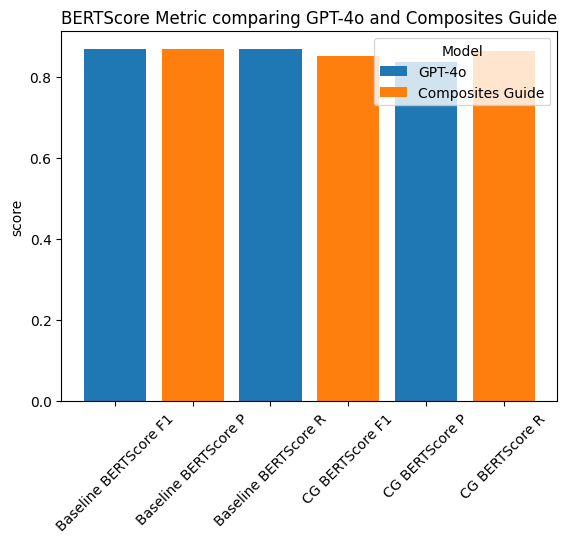

In [18]:
fig,ax = plt.subplots()
fruits = ['Baseline BERTScore F1', 'Baseline BERTScore P', 'Baseline BERTScore R',
          'CG BERTScore F1', 'CG BERTScore P', 'CG BERTScore R',]
        
counts = [baseline_F1.mean(),baseline_P.mean(),baseline_R.mean(),
          cg_F1.mean(),cg_P.mean(),cg_R.mean(),]
        
bar_labels = ['GPT-4o', '_GPT-4o','_GPT-4o','Composites Guide','_Composites Guide', '_Composites Guide']
bar_colors = ['tab:blue', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('score')
ax.set_title('BERTScore Metric comparing GPT-4o and Composites Guide')
ax.legend(title='Model')
plt.savefig("BERT_CG.svg")
plt.show()

In [19]:
baselinescores = scorer.get_scores(mmr_baseline_y_pred,mmr_y_true,avg = True)
baselinescores

{'rouge-1': {'r': 0.24657903366152784,
  'p': 0.2532348126270006,
  'f': 0.2375073041236745},
 'rouge-2': {'r': 0.06915024376339565,
  'p': 0.0656479720756023,
  'f': 0.06427580466860454},
 'rouge-l': {'r': 0.23161562052575246,
  'p': 0.2360609018882446,
  'f': 0.2220474064933772}}

In [76]:
df5 = pd.DataFrame(test_scores)
df5.to_csv('baselineEQ_rouge.csv',index=False)

In [20]:
mmr_test_scores = scorer.get_scores(mmr_test_y_pred,mmr_y_true,avg = True)
mmr_test_scores

{'rouge-1': {'r': 0.3071029023260669,
  'p': 0.15813062824920596,
  'f': 0.19891946911528982},
 'rouge-2': {'r': 0.07512034262141606,
  'p': 0.03896827469839495,
  'f': 0.04808639801076858},
 'rouge-l': {'r': 0.28841662091338927,
  'p': 0.14706350471789173,
  'f': 0.1853471927299414}}

In [75]:
df6 = pd.DataFrame(test_scores)
df6.to_csv('EQ_rouge.csv',index=False)

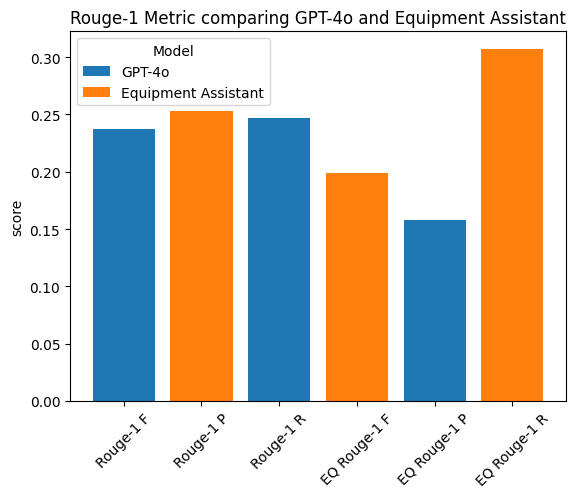

In [21]:
fig,ax = plt.subplots()
fruits = ['Rouge-1 F', 'Rouge-1 P', 'Rouge-1 R',
          'EQ Rouge-1 F', 'EQ Rouge-1 P', 'EQ Rouge-1 R',]
        
counts = [baselinescores['rouge-1']['f'],baselinescores['rouge-1']['p'],baselinescores['rouge-1']['r'],
          mmr_test_scores['rouge-1']['f'],mmr_test_scores['rouge-1']['p'],mmr_test_scores['rouge-1']['r'],]
        
bar_labels = ['GPT-4o', '_GPT-4o','_GPT-4o','Equipment Assistant','_Equipment Assistant', '_Equipment Assistant']
bar_colors = ['tab:blue', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('score')
ax.set_title('Rouge-1 Metric comparing GPT-4o and Equipment Assistant')
ax.legend(title='Model')
plt.savefig("ROUGE-1_EQ.svg")
plt.show()


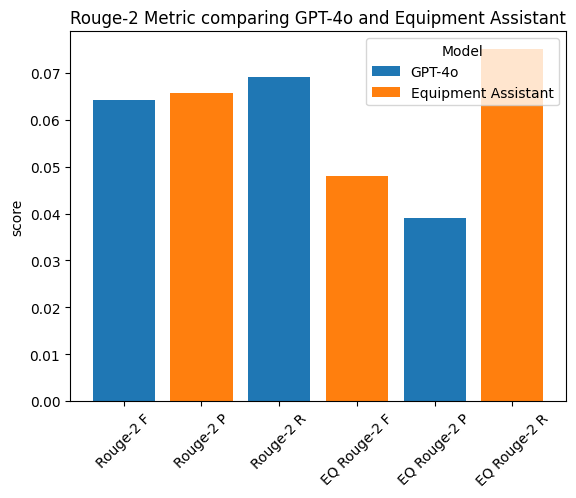

In [22]:
fig,ax = plt.subplots()
fruits = ['Rouge-2 F', 'Rouge-2 P', 'Rouge-2 R',
          'EQ Rouge-2 F', 'EQ Rouge-2 P', 'EQ Rouge-2 R',]
        
counts = [baselinescores['rouge-2']['f'],baselinescores['rouge-2']['p'],baselinescores['rouge-2']['r'],
          mmr_test_scores['rouge-2']['f'],mmr_test_scores['rouge-2']['p'],mmr_test_scores['rouge-2']['r'],]
        
bar_labels = ['GPT-4o', '_GPT-4o','_GPT-4o','Equipment Assistant','_Equipment Assistant', '_Equipment Assistant']
bar_colors = ['tab:blue', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('score')
ax.set_title('Rouge-2 Metric comparing GPT-4o and Equipment Assistant')
ax.legend(title='Model')
plt.savefig("ROUGE-2_EQ.svg")
plt.show()


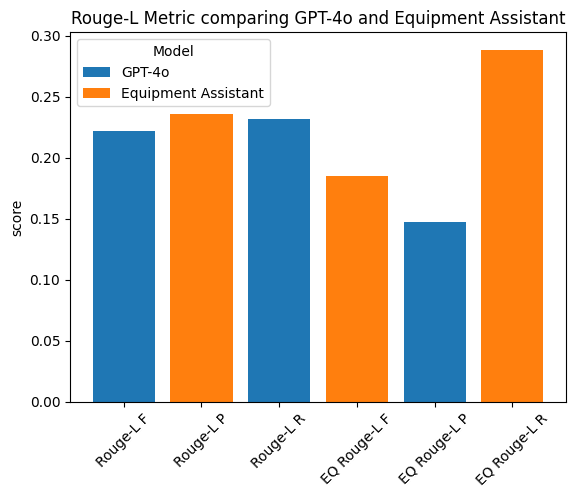

In [23]:
fig,ax = plt.subplots()
fruits = ['Rouge-L F', 'Rouge-L P', 'Rouge-L R',
          'EQ Rouge-L F', 'EQ Rouge-L P', 'EQ Rouge-L R',]
        
counts = [baselinescores['rouge-l']['f'],baselinescores['rouge-l']['p'],baselinescores['rouge-l']['r'],
          mmr_test_scores['rouge-l']['f'],mmr_test_scores['rouge-l']['p'],mmr_test_scores['rouge-l']['r'],]
        
bar_labels = ['GPT-4o', '_GPT-4o','_GPT-4o','Equipment Assistant','_Equipment Assistant', '_Equipment Assistant']
bar_colors = ['tab:blue', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('score')
ax.set_title('Rouge-L Metric comparing GPT-4o and Equipment Assistant')
ax.legend(title='Model')
plt.savefig("ROUGE-L_EQ.svg")
plt.show()


In [24]:
bmmr_P, bmmr_R, bmmr_F1 = score(mmr_baseline_y_pred,mmr_y_true,lang='en',verbose=True)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 7/7 [00:26<00:00,  3.82s/it]


computing greedy matching.


100%|██████████| 4/4 [00:00<00:00, 57.13it/s]

done in 26.81 seconds, 7.42 sentences/sec


In [74]:
gpt_mmr = {'BERTScore P': bmmr_P, 'BERTScore R' : bmmr_R, 'BERTScore F1' : bmmr_F1}
df7 = pd.DataFrame(gpt_mmr)
df7.to_csv('baselineEQ_bert.csv', index=False)

In [25]:
print(f"System Level Precision: {bmmr_P.mean()}\nSystem Level Recall {bmmr_R.mean()}\nSystem Level F1 score{bmmr_F1.mean()}")

System Level Precision: 0.8761197924613953
System Level Recall 0.8681014776229858
System Level F1 score0.8718871474266052


In [26]:
tmmr_P, tmmr_R, tmmr_F1 = score(mmr_test_y_pred,mmr_y_true,lang='en',verbose=True)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 7/7 [00:45<00:00,  6.48s/it]


computing greedy matching.


100%|██████████| 4/4 [00:00<00:00, 47.05it/s]

done in 45.47 seconds, 4.38 sentences/sec


In [73]:
eq_mmr = {'BERTScore P': tmmr_P, 'BERTScore R' : tmmr_R, 'BERTScore F1' : tmmr_F1}
df8 = pd.DataFrame(eq_mmr)
df8.to_csv('EQ_bert.csv', index=False)

In [27]:
print(f"System Level Precision: {tmmr_P.mean()}\nSystem Level Recall {tmmr_R.mean()}\nSystem Level F1 score{tmmr_F1.mean()}")

System Level Precision: 0.8443738222122192
System Level Recall 0.867805540561676
System Level F1 score0.8557149767875671


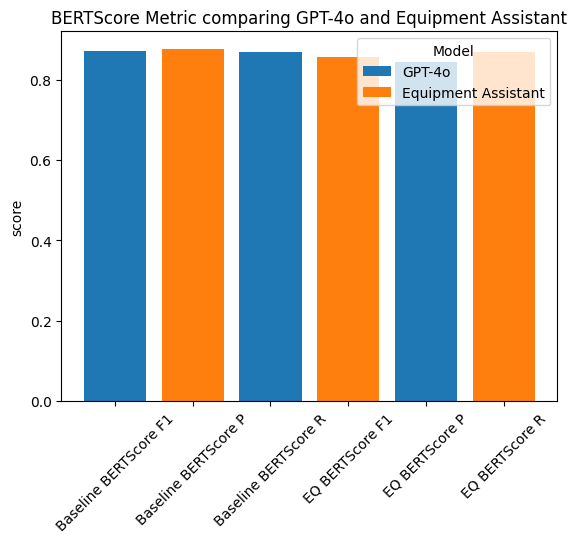

In [28]:
fig,ax = plt.subplots()
fruits = ['Baseline BERTScore F1', 'Baseline BERTScore P', 'Baseline BERTScore R',
          'EQ BERTScore F1', 'EQ BERTScore P', 'EQ BERTScore R',]
        
counts = [bmmr_F1.mean(),bmmr_P.mean(),bmmr_R.mean(),
          tmmr_F1.mean(),tmmr_P.mean(),tmmr_R.mean(),]
        
bar_labels = ['GPT-4o', '_GPT-4o','_GPT-4o','Equipment Assistant','_Equipment Assistant', '_Equipment Assistant']
bar_colors = ['tab:blue', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('score')
ax.set_title('BERTScore Metric comparing GPT-4o and Equipment Assistant')
ax.legend(title='Model')
plt.savefig("BERT_EQ.svg")
plt.show()

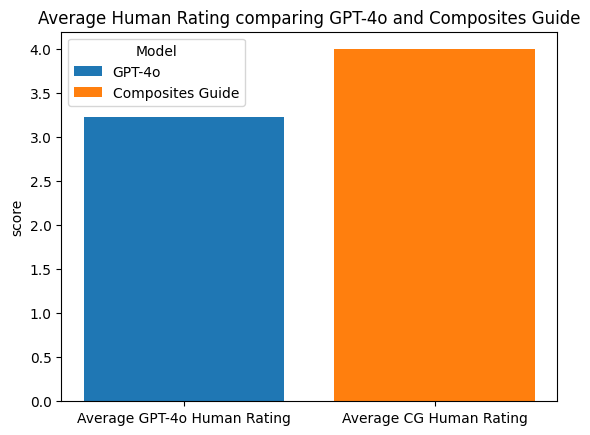

In [29]:
fig,ax = plt.subplots()
fruits = ['Average GPT-4o Human Rating', 'Average CG Human Rating', ]
        
counts = [3.23, 4.0]
        
bar_labels = ['GPT-4o', 'Composites Guide']
bar_colors = ['tab:blue', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
#ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('score')
ax.set_title('Average Human Rating comparing GPT-4o and Composites Guide')
ax.legend(title='Model')
plt.savefig("Human_CG.svg")
plt.show()

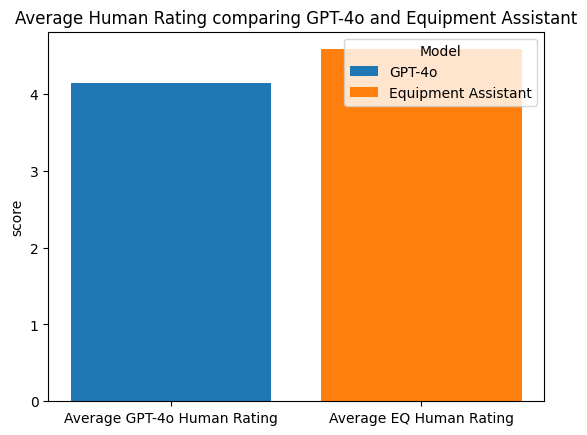

In [45]:
fig,ax = plt.subplots()
fruits = ['Average GPT-4o Human Rating', 'Average EQ Human Rating', ]
        
counts = [4.14, 4.58]
        
bar_labels = ['GPT-4o', 'Equipment Assistant']
bar_colors = ['tab:blue', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
#ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('score')
ax.set_title('Average Human Rating comparing GPT-4o and Equipment Assistant')
ax.legend(title='Model')
plt.savefig("Human_EQ.svg")
plt.show()

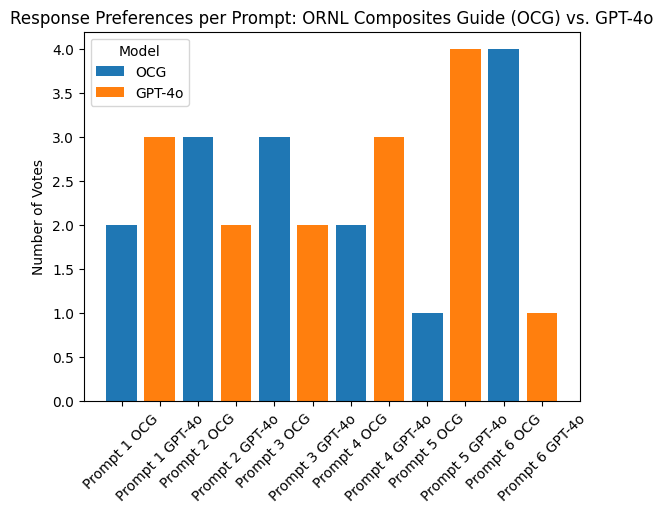

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
fruits = ['Prompt 1 OCG', 'Prompt 1 GPT-4o','Prompt 2 OCG','Prompt 2 GPT-4o', 'Prompt 3 OCG','Prompt 3 GPT-4o',
          'Prompt 4 OCG', 'Prompt 4 GPT-4o','Prompt 5 OCG','Prompt 5 GPT-4o', 'Prompt 6 OCG','Prompt 6 GPT-4o',]
        
counts = [2,3,3,2,3,2,2,3,1,4,4,1]
        
bar_labels = ['OCG', 'GPT-4o', '_OCG','_GPT-4o', '_OCG','_GPT-4o', '_OCG','_GPT-4o', '_OCG','_GPT-4o', '_OCG','_GPT-4o']
bar_colors = ['tab:blue', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('Number of Votes')
ax.set_title('Response Preferences per Prompt: ORNL Composites Guide (OCG) vs. GPT-4o')
ax.legend(title='Model')

plt.show()

<Figure size 640x480 with 0 Axes>

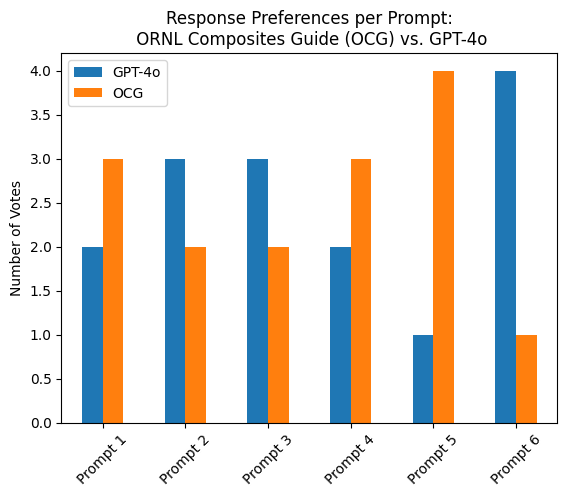

In [48]:
width1 = 0.5
import pandas as pd
fruits = ['Prompt 1','Prompt 2', 'Prompt 3',
          'Prompt 4','Prompt 5', 'Prompt 6',]
_data = {'GPT-4o' :[2,3,3,2,1,4],
         'OCG' :[3,2,2,3,4,1]} 
_df = pd.DataFrame(_data,columns=['GPT-4o','OCG'],index = ['Prompt 1','Prompt 2', 'Prompt 3','Prompt 4','Prompt 5', 'Prompt 6',])        
# Create the first subplot
fig = plt.figure()
_df.plot.bar()
plt.ylabel('Number of Votes')
plt.title('Response Preferences per Prompt:\n ORNL Composites Guide (OCG) vs. GPT-4o')
# Display the plt
plt.xticks(rotation=45)
plt.savefig("ResponsePref.svg")
plt.show()